<a href="https://colab.research.google.com/github/mariabandeira/Reconhecimento-de-Digitos/blob/main/MiniProjeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Dígitos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.preprocessing import MinMaxScaler
#warnings.filterwarnings('ignore')

In [2]:
train_redu = pd.read_csv('dataset/train_redu.csv')
test_redu = pd.read_csv('dataset/test_redu.csv')

# 3.3. Classificador de dígitos completo

In [4]:
# normalização para PLA e Regressão Logística
scaler = MinMaxScaler()

train_redu_scaled = scaler.fit_transform(train_redu.drop('label', axis=1)) # ajusta e transforma
test_redu_scaled = scaler.transform(test_redu.drop('label', axis=1)) # apenas transforma (faz com que não haja vazamento de dados)

train_redu['i_normalizada'] = train_redu_scaled[:,0]
train_redu['s_normalizada'] = train_redu_scaled[:,1]

test_redu['i_normalizada'] = test_redu_scaled[:,0]
test_redu['s_normalizada'] = test_redu_scaled[:,1]

In [5]:
X_train0_lin = train_redu[['intensidade', 'simetria']].values
y_train0_lin = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_lin = test_redu[['intensidade', 'simetria']].values
y_test0_lin = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])

## Regressão Logística

In [6]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample

class LogisticRegression_:
  def __init__(self, eta=0.1, tmax=1000, bs=1000000):
    self.eta = eta
    self.tmax = tmax
    self.batch_size = bs

  # Infere o vetor w da funçao hipotese
  #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
  def fit(self, _X, _y):
    X = np.array(_X)
    y = np.array(_y)

    N = X.shape[0]
    d = X.shape[1]
    self.w = np.zeros(d)

    for t in range(self.tmax):
      #grad_t = -1 / N * np.sum((_y @ _X) / (1 + np.exp(_y @ w @ t @ _X)))
      grad_t = (1 / N) * X.T.dot(self.predict_prob(X) - y)

      if LA.norm(grad_t) < 1e-3:
        break

      self.w -= self.eta * grad_t

  #funcao hipotese inferida pela regressa logistica
  def predict_prob(self, X):
    s = np.dot(X, self.w)
    prob = np.exp(s) / (1 + np.exp(s))
    return prob

  #Predicao por classificação linear
  def predict(self, X):
    prob = self.predict_prob(X)
    y = np.where(prob >= 0.5, 1, -1)
    return y

  def getW(self):
    return self.w

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [7]:
import numpy as np
from numpy import linalg as LA
import random

# joão paulo's version

class LogisticRegressionJ_:
    def __init__(self, eta=0.1, tmax=1000, bs=12):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = bs

    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)
        N = X.shape[0]
        d = X.shape[1]
        w = np.zeros(d, dtype=float)
        self.w = []

        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=float)

            # Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = random.sample(range(N), self.batch_size)
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            # Computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))

            gt = vsoma / self.batch_size
            # Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001:
                break
            w = w + (self.eta * gt)

        self.w = w

    def predict_prob(self, X):
        #ATS
        s = np.dot(X, self.w)
        prob = np.exp(s) / (1 + np.exp(s))
        return prob
        
        #return [(1 / (1 + np.exp(-(self.w.T @ x)))) for x in X]

    def predict(self, X):
        # ATS
        prob = self.predict_prob(X)
        y = np.where(prob >= 0.5, 1, -1)
        return y
    
        #return [1 if (1 / (1 + np.exp(-(self.w.T @ x)))) >= 0.5 else -1 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0] + shift - self.w[1] * regressionX) / self.w[2]

In [8]:
# utilizando os dados normalizados
X_train0_log = np.hstack((np.ones((len(train_redu), 1)), train_redu[['i_normalizada', 's_normalizada']].values))
y_train0_log = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_log = np.hstack((np.ones((len(test_redu), 1)), test_redu[['i_normalizada', 's_normalizada']].values))
y_test0_log = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])


# dados originais
X_train0_log_rev = scaler.inverse_transform(train_redu[['i_normalizada', 's_normalizada']].values)
X_train0_log_rev = np.hstack((np.ones((len(train_redu), 1)), X_train0_log_rev))

X_test0_log_rev = scaler.inverse_transform(test_redu[['i_normalizada', 's_normalizada']].values)
X_test0_log_rev = np.hstack((np.ones((len(test_redu), 1)), X_test0_log_rev))

In [9]:
LR0 = LogisticRegressionJ_(0.1, 1000)

LR0.fit(X_train0_log, y_train0_log)

pred_log0 = LR0.predict(X_train0_log)

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


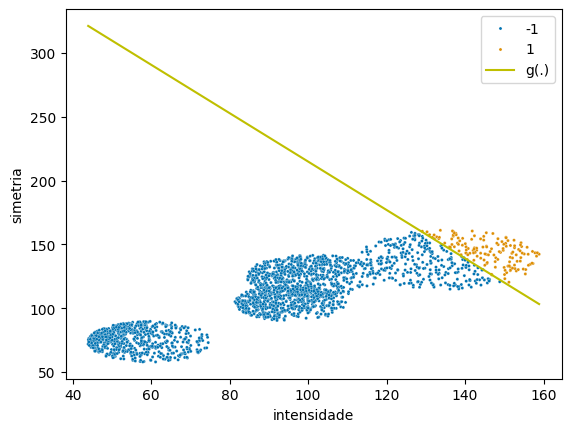

In [10]:
# plotagem
xmin = X_train0_log_rev[:,1].min()
xmax = X_train0_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train0_log, data=train_redu, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=LR0.predict(X_train0_log), data=train_redu, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR0.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR0.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [12]:
def new_data(X, y_pred):
  indices_to_keep = []
  for i in range(len(X)):
    if(np.array(y_pred[i]) == -1):
      indices_to_keep.append(i)
  return X.iloc[indices_to_keep]

In [13]:
train_redu_0_log = new_data(train_redu, pred_log0)

In [14]:
X_train1_log = train_redu_0_log[['i_normalizada', 's_normalizada']].values
X_train1_log = np.hstack((np.ones((len(X_train1_log), 1)), X_train1_log))
   
y_train1_log = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0_log['label']])

# dados originais
X_train1_log_rev = scaler.inverse_transform(train_redu_0_log[['i_normalizada', 's_normalizada']].values)
X_train1_log_rev = np.hstack((np.ones((len(train_redu_0_log), 1)), X_train1_log_rev))

In [15]:
LR1 = LogisticRegressionJ_(0.1, 1000)
LR1.fit(X_train1_log, y_train1_log)
pred_log1 = LR1.predict(X_train1_log)
pred_log1[:5]

array([-1, -1, -1, -1, -1])

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


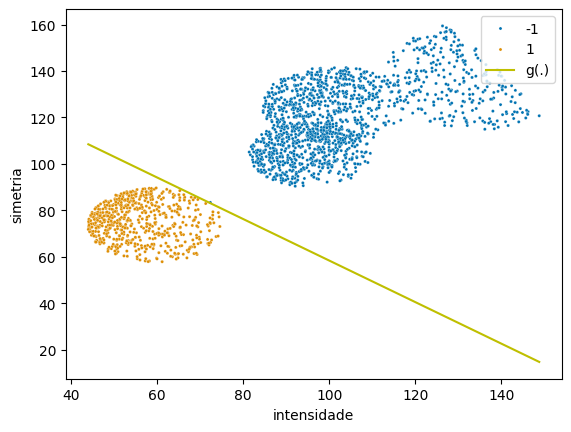

In [16]:
# dados originais
xmin = X_train1_log_rev[:,1].min()
xmax = X_train1_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train1_log, data=train_redu_0_log, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=pred_log1, data=train_redu_0_log, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR1.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR1.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [17]:
train_redu_1_log = new_data(train_redu_0_log, pred_log1)

In [18]:
X_train4_log = train_redu_1_log[['i_normalizada', 's_normalizada']].values
X_train4_log = np.hstack((np.ones((len(X_train4_log), 1)), X_train4_log))

y_train4_log = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1_log['label']])

# dados originais
X_train4_log_rev = scaler.inverse_transform(train_redu_1_log[['i_normalizada', 's_normalizada']].values)
X_train4_log_rev = np.hstack((np.ones((len(train_redu_1_log), 1)), X_train4_log_rev))

In [19]:
LR4 = LogisticRegressionJ_(0.1, 1000)
LR4.fit(X_train4_log, y_train4_log)
pred_log4 = LR4.predict(X_train4_log)

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


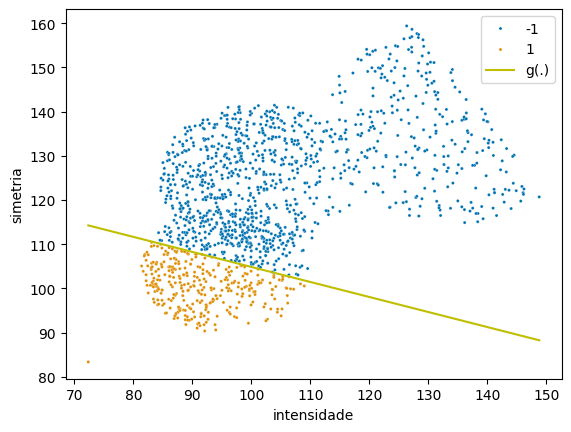

In [20]:
xmin = X_train4_log_rev[:,1].min()
xmax = X_train4_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train4_log, data=train_redu_1_log, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=pred_log4, data=train_redu_1_log, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR4.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR4.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [21]:
def f0(x):
    pred = LR0.predict(x)
    return np.array(pred)

def f1(x):
    pred = LR1.predict(x)
    return np.array(pred)

def f4(x):
    pred = LR4.predict(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5
    
# classificando com os dados de treino
# Ein
digito_classificado_log = []
for i in range(len(X_train0_log)):
  imagem_teste = X_train0_log[i]
  digito_classificado_log.append(classificar_digito(imagem_teste))

# classificando com os dados de teste
# Eout
digito_classificado_teste_log = []
for i in range(len(X_test0_log)):
  imagem_teste = X_test0_log[i]
  digito_classificado_teste_log.append(classificar_digito(imagem_teste))

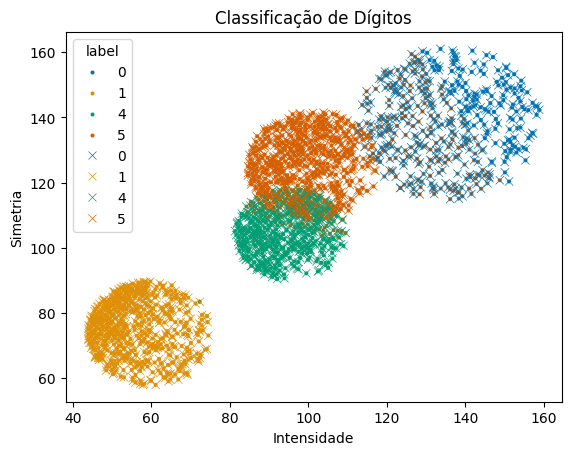

In [22]:
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_log, data=train_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

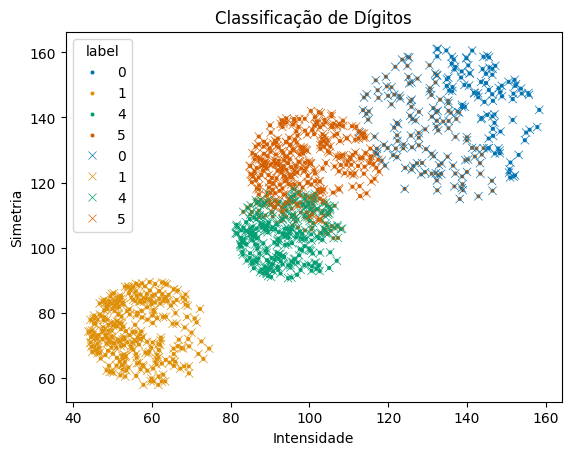

In [23]:
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_teste_log, data=test_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [24]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(digito_classificado_log[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(digito_classificado_teste_log[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.247483989021043
Eout = 0.2358744394618834


In [25]:
print(classification_report(train_redu['label'].tolist(), digito_classificado_log))

              precision    recall  f1-score   support

           0       1.00      0.34      0.50       425
           1       1.00      1.00      1.00       608
           4       1.00      0.55      0.71       577
           5       0.52      1.00      0.68       576

    accuracy                           0.75      2186
   macro avg       0.88      0.72      0.72      2186
weighted avg       0.87      0.75      0.74      2186



In [26]:
print(classification_report(test_redu['label'].tolist(), digito_classificado_teste_log))

              precision    recall  f1-score   support

           0       1.00      0.41      0.58       218
           1       1.00      1.00      1.00       292
           4       1.00      0.57      0.73       314
           5       0.53      1.00      0.69       291

    accuracy                           0.76      1115
   macro avg       0.88      0.75      0.75      1115
weighted avg       0.88      0.76      0.76      1115



In [27]:
cm_train = confusion_matrix(train_redu['label'], digito_classificado_log)
print(cm_train)

[[143   0   0 282]
 [  0 607   1   0]
 [  0   0 319 258]
 [  0   0   0 576]]


In [28]:
cm_test = confusion_matrix(test_redu['label'], digito_classificado_teste_log)
print(cm_test)

[[ 90   0   0 128]
 [  0 292   0   0]
 [  0   0 179 135]
 [  0   0   0 291]]
